# Football Analytics with Data Revolution

### Using **[Football Data]**

#### Tutorial will cover:
1. Downloading and Parsing Football Data Json File
2. Basic Pass Map Visualization
3. Pass Classification using KMeans Clustering
4. Pass Sequence Prediction using LSTM
5. Evaluate Predictability of Team Ball Movement 

#### Python Dependances Include:
- *sklearn* for clustering
- *matplotlib* for visualization
- *keras* (and Tensorflow Backend) for neural network model
- *pandas* for data frame wrangling

[Football Data]: https://github.com/Kkumar-20/My_Thesis/tree/main/data "Open Data Github Repository"

## 1. Downloading and Parsing Football Data Json File

In [2]:
import requests

## Football's competition 37

In [3]:
import re, json, requests

url = 'https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/37/4.json'

resp = requests.get(url)
resp_parsed = re.sub(r'^jsonp\d+\(|\)\s+$', '', resp.text)
football = json.loads(resp_parsed)

### A list comprehension is the same as doing this:

In [4]:
mat_id = [f['match_id'] for f in football]

In [5]:
print("There are {} games in this list".format(len(mat_id)))

There are 108 games in this list


#### Football Data Display

In [4]:
import pandas as pd
pd.DataFrame.from_dict(football[0])

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,metadata,match_week,competition_stage,stadium,referee
competition_id,7298,2018-02-24,20:45:00.000,37,NaN,NaN,NaN,2,2,available,scheduled,2022-05-27T12:02:24.272045,2021-06-13T16:17:31.694,NaN,0,NaN,NaN,NaN
country_name,7298,2018-02-24,20:45:00.000,England,NaN,NaN,NaN,2,2,available,scheduled,2022-05-27T12:02:24.272045,2021-06-13T16:17:31.694,NaN,0,NaN,NaN,NaN
competition_name,7298,2018-02-24,20:45:00.000,FA Women's Super League,NaN,NaN,NaN,2,2,available,scheduled,2022-05-27T12:02:24.272045,2021-06-13T16:17:31.694,NaN,0,NaN,NaN,NaN
season_id,7298,2018-02-24,20:45:00.000,NaN,4,NaN,NaN,2,2,available,scheduled,2022-05-27T12:02:24.272045,2021-06-13T16:17:31.694,NaN,0,NaN,NaN,NaN
season_name,7298,2018-02-24,20:45:00.000,NaN,2018/2019,NaN,NaN,2,2,available,scheduled,2022-05-27T12:02:24.272045,2021-06-13T16:17:31.694,NaN,0,NaN,NaN,NaN
home_team_id,7298,2018-02-24,20:45:00.000,NaN,NaN,746,NaN,2,2,available,scheduled,2022-05-27T12:02:24.272045,2021-06-13T16:17:31.694,NaN,0,NaN,NaN,NaN
home_team_name,7298,2018-02-24,20:45:00.000,NaN,NaN,Manchester City WFC,NaN,2,2,available,scheduled,2022-05-27T12:02:24.272045,2021-06-13T16:17:31.694,NaN,0,NaN,NaN,NaN
home_team_gender,7298,2018-02-24,20:45:00.000,NaN,NaN,female,NaN,2,2,available,scheduled,2022-05-27T12:02:24.272045,2021-06-13T16:17:31.694,NaN,0,NaN,NaN,NaN
home_team_group,7298,2018-02-24,20:45:00.000,NaN,NaN,None,NaN,2,2,available,scheduled,2022-05-27T12:02:24.272045,2021-06-13T16:17:31.694,NaN,0,NaN,NaN,NaN
country,7298,2018-02-24,20:45:00.000,NaN,NaN,"{'id': 68, 'name': 'England'}","{'id': 68, 'name': 'England'}",2,2,available,scheduled,2022-05-27T12:02:24.272045,2021-06-13T16:17:31.694,NaN,0,NaN,"{'id': 68, 'name': 'England'}","{'id': 68, 'name': 'England'}"


## Match Identity

In [5]:
mat_id[:5]

[7298, 19778, 19771, 19736, 19745]

## Build a Python Class for Handling Pass Football Data

In [6]:
class Pass(object):
    def __init__(self, **kwargs):            
        for key, value in kwargs.items():
            setattr(self, key, value)
    
    # This method is useful later for creating training data for clustering
    def vector(self):
        return [self.x, self.end_x, self.y, self.end_y]

#### Example Pass Object Instance

In [7]:
example_pass = Pass(**{"team":"West Ham United LFC", "x":53.0, "analyst":"Olli Harder", "etc":"..."})

####  allows you to pass keyworded variable length of arguments to a function

In [8]:
print(example_pass)

### Template URL at which each game's event data is stored

In [9]:
da_sor = {}

mat_da_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/{}.json"

# This takes some time, naturally
for m in mat_id:
    
    # Empty List for each game
    da_sor[m] = []
    
    # Get all events from a particular game
    all_events = requests.get(url=mat_da_url.format(m)).json()
    
    # Filter them by type-name Pass
    passes = [x for x in all_events if x['type']['name'] == "Pass"]
    for p in passes:
                
        # Store attributes in dictionary
        attr_but = {
            "team": p["possession_team"]["name"],
            "possession_id": p["possession"],
            "x": p['location'][0],
            "y": p['location'][1],
            "end_x": p['pass']['end_location'][0],
            "end_y": p['pass']['end_location'][1]
        }
        
        # Construct Pass object from attribute keywords and store
        da_sor[m].append(Pass(**attr_but))

## 2. Basic Pass Map Visualization

In [10]:
import matplotlib.pyplot as plt

### Nice trick for high-resolution figures on retina screen

In [11]:
%config InlineBackend.figure_format = 'retina'

### Plot all passes from single game

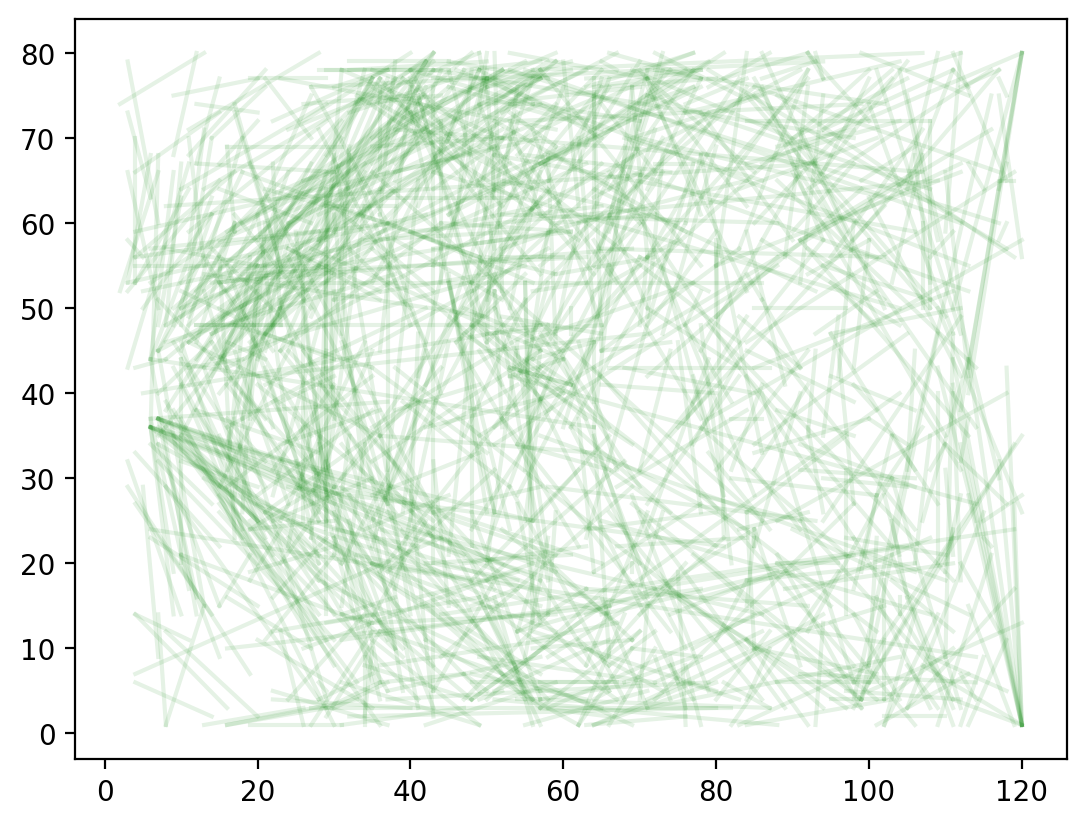

In [12]:
match = 19783  # Chelsea FCW vs Everton LFC Plot all passes from single game

for p in [p for p in da_sor[match]]:
    plt.plot([p.x, p.end_x],[p.y, p.end_y], c='green', alpha=0.1)
plt.show()

## 3. Pass Classification using KMeans Clustering

In [13]:
from sklearn.cluster import KMeans
import numpy as np

In [14]:
np.random.seed(42)

### Create training data for clustering

In [15]:
train_data = []
for match_id, passes in da_sor.items():
    for p in passes:
        # For each pass, use the vector method
        train_data.append(p.vector())

In [16]:
# Perform the clustering on the training data
# 49 is mostly arbitrary, first index is used for end-of-sequence in later analysis
cluster_model = KMeans(n_clusters=49).fit(train_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


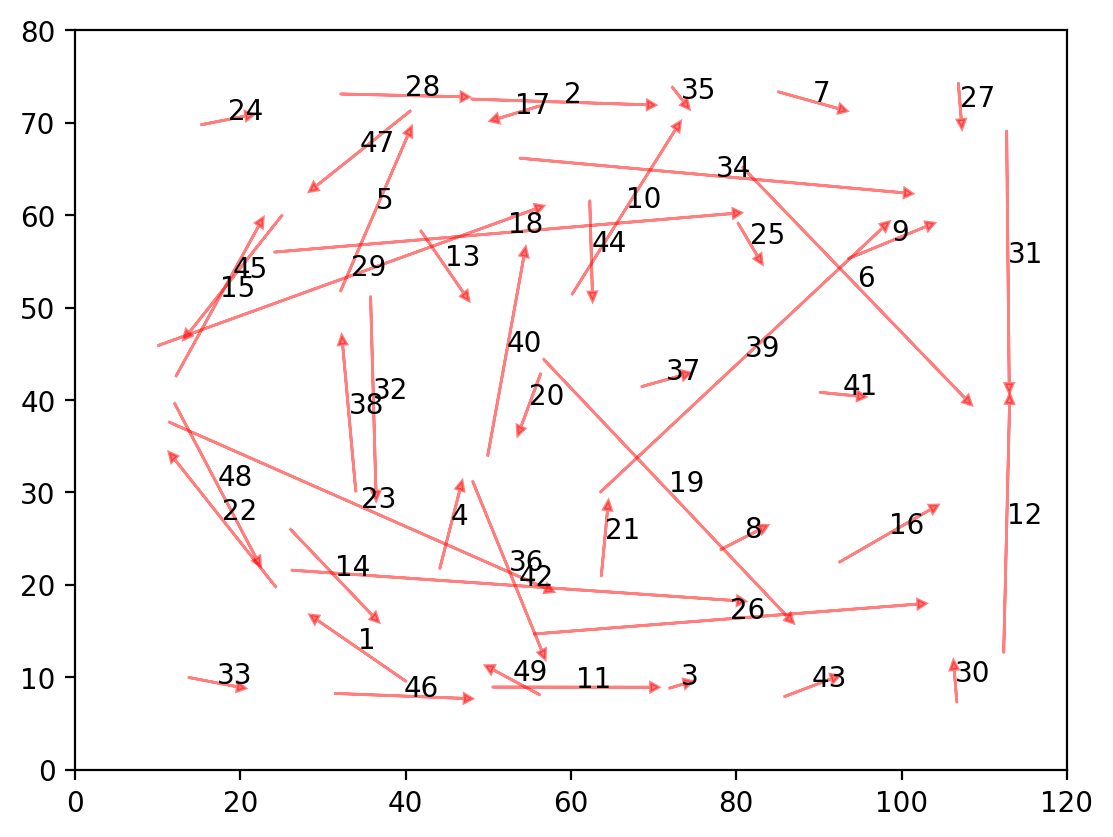

In [17]:
for i, (x, end_x, y, end_y) in enumerate(cluster_model.cluster_centers_):
    plt.arrow(x, y, end_x-x, end_y-y,
              head_width=1,
              head_length=1,
              color='red',
              alpha=0.5,
              length_includes_head=True)
    
    plt.text((x+end_x)/2, (y+end_y)/2, str(i+1))
    
plt.xlim(0,120)
plt.ylim(0,80)
plt.show()

In [18]:
for match_id, passes in da_sor.items():
    for p in passes:
        # evaluate pass vector and make pass_cluster prediction
        # We add +1 to reserve index 0 for sequence modeling later
        pas_clus = cluster_model.predict([p.vector()])[0] + 1
        
        # Set pass_cluster attribute on pass object
        setattr(p, "pass_cluster", pas_clus)

## 4. Pass Sequence Prediction using LSTM

In [19]:
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.models import Sequential

### Construct Training Data

In [20]:
X_Train = []
Y_Train = []

# For Use Later
Team_lab = []

for mat_i, passes in da_sor.items():
    
    # Find Unique Possessions in pass data
    possessions = set([p.possession_id for p in passes])
    
    # For each possession, create a list of pass clusters inside it
    for possession_id in possessions:
        sequence = [[p.pass_cluster, p.team] for p in passes if p.possession_id == possession_id]
        sequence.append([0, None])
        
        # Create subsequences and trim/pad sequences to five (5) passes
        # TODO Make a graphic for this, since it's confusing
        for i in range(4 if len(sequence) > 5 else len(sequence) - 1):
            adj_seq = []
            target = sequence[i+1][0]
            for j in range(0,4):
                adj_seq.append(sequence[j][0] if j <= i else 0)
            adj_seq.append(0)
            
            X_Train.append(np.array(adj_seq).reshape(5,1))
                        
            # One-hot encoding for target classification
            Y_Train.append([1 if k == target else 0 for k in range(0,50)])
            Team_lab.append(sequence[i+1][1])
            

### Build Sequential Neural Network

In [21]:
model = Sequential()

# Add LSTM to Model
model.add(LSTM(200, input_shape=(5,1)))

### The Final Layer has a shape equal to the number of clusters

In [22]:
model.add(Dense(50, activation='softmax'))

# Compile using loss of Categorical Crossentropy
model.compile(loss='categorical_crossentropy', optimizer='adam')

#### Model Summary

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 50)                10050     
                                                                 
Total params: 171,650
Trainable params: 171,650
Non-trainable params: 0
_________________________________________________________________


### Fit the model

In [24]:
# Takes ~8 minutes on my Macbook
X_Train1 = np.array(X_Train)
Y_Train1 = np.array(Y_Train)
model.fit([X_Train1], [Y_Train1], epochs=15, batch_size=50, verbose=1)

Epoch 1/15
1225/1225 [==============================] - 31s 23ms/step - loss: 3.4914
Epoch 2/15
1225/1225 [==============================] - 31s 26ms/step - loss: 3.3863
Epoch 3/15
1225/1225 [==============================] - 25s 20ms/step - loss: 3.2612
Epoch 4/15
1225/1225 [==============================] - 24s 20ms/step - loss: 3.1557
Epoch 5/15
1225/1225 [==============================] - 24s 20ms/step - loss: 3.0827
Epoch 6/15
1225/1225 [==============================] - 25s 21ms/step - loss: 3.0251
Epoch 7/15
1225/1225 [==============================] - 24s 20ms/step - loss: 2.9810
Epoch 8/15
1225/1225 [==============================] - 28s 23ms/step - loss: 2.9392
Epoch 9/15
1225/1225 [==============================] - 25s 21ms/step - loss: 2.9071
Epoch 10/15
1225/1225 [==============================] - 25s 21ms/step - loss: 2.8815
Epoch 11/15
1225/1225 [==============================] - 24s 20ms/step - loss: 2.8546
Epoch 12/15
1225/1225 [==============================] - 24s 20

### Make Prediction on sequence

1/1 [==============================] - 0s 484ms/step


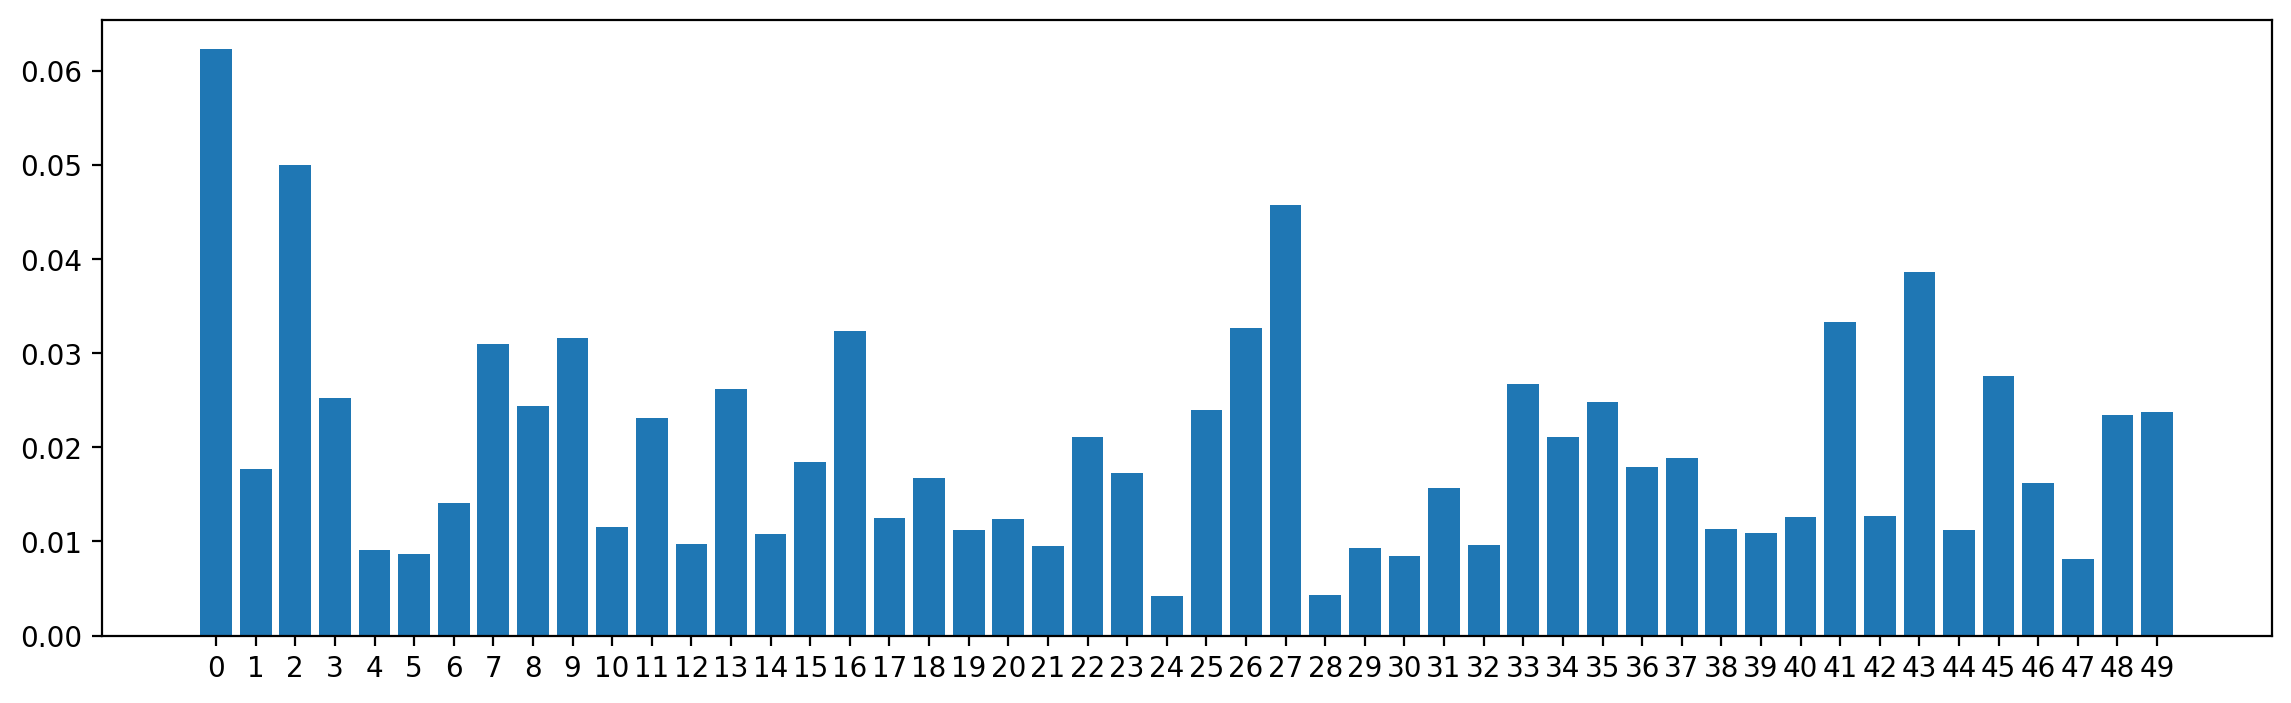

In [25]:
sequence = [30,0,0,0,0]
predictions = model.predict([[np.array(sequence).reshape(5,1)]])[0]

plt.figure(figsize=(14,4))
plt.bar(range(0,50), predictions, tick_label=[str(i) for i in range(50)])
plt.show()

# This makes intuitive sense when you look back at pass cluster map.

### Plot Possession Sequence, and Likely Next Passes

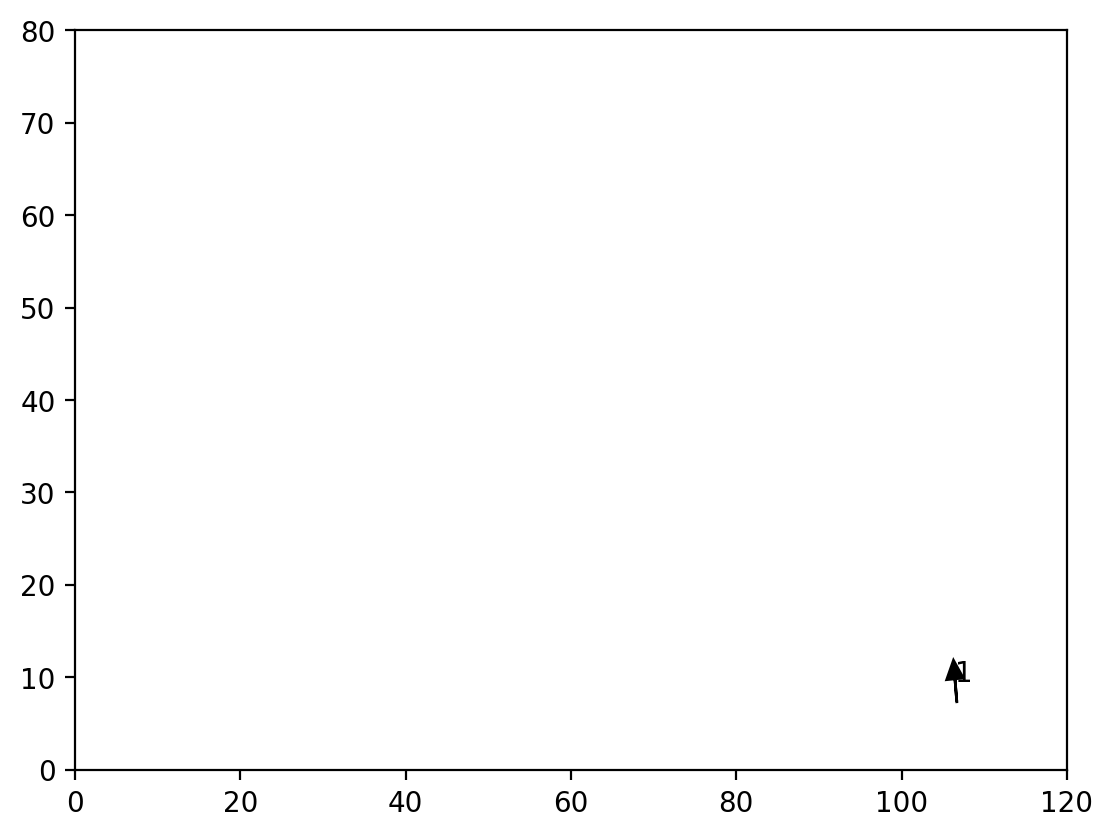

In [26]:
for i, (x, end_x, y, end_y) in enumerate([cluster_model.cluster_centers_[i-1] for i in sequence if i > 0]):    
    
    plt.arrow(x, y, end_x-x, end_y-y,
              head_width=2,
              head_length=2,
              color='black',
              length_includes_head=True)
    
    plt.text((x+end_x)/2, (y+end_y)/2, str(i+1))
    
for i, (x, end_x, y, end_y) in enumerate(cluster_model.cluster_centers_):
    
    if predictions[i+1] > 0.1:    
        plt.arrow(x, y, end_x-x, end_y-y,
                  head_width=2,
                  head_length=2,
                  color='red',
                  alpha=0.5,
                  length_includes_head=True)
plt.xlim(0,120)
plt.ylim(0,80)
plt.show()

## 5. Evaluate Team Ball Movement

In [27]:
import pandas as pd

In [28]:
Team_lis = {x:{"passes":0, "likely_passes":0} for x in set(Team_lab)}

### (It's running prediections on entire data set)

In [29]:
# This takes a minute or two
for i, e in enumerate(X_Train):
        
    Pas_typ = Y_Train[i].index(1)
    Predict = list(model.predict([[e]])[0])
    
    Mos_lik_pas = Predict.index(max(Predict))
    
    Team_lis[Team_lab[i]]["passes"] += 1
    Team_lis[Team_lab[i]]["likely_passes"] += 1 if Pas_typ == Mos_lik_pas else 0

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 32ms/step


KeyboardInterrupt: ignored

In [30]:
Tabl = [[k,
          Team_lis[k]["passes"],
          Team_lis[k]["likely_passes"]] for k,v in Team_lis.items() if k is not None]

foot = pd.DataFrame(Tabl, columns=["Team", "Pass Count", "Likely Passes"])

In [31]:
foot['Predictability'] = foot['Likely Passes'] / foot['Pass Count']

In [32]:
foot.sort_values(by=['Predictability'], ascending=True)

,Team,Pass Count,Likely Passes,Predictability
8,Bristol City WFC,1795,2,0.001114
4,Yeovil Town LFC,1741,2,0.001149
7,Manchester City WFC,2409,4,0.001660
5,Reading WFC,2114,5,0.002365
0,Brighton & Hove Albion WFC,1628,4,0.002457
10,Chelsea FCW,3993,13,0.003256
1,Birmingham City WFC,2399,8,0.003335
2,Liverpool WFC,1774,7,0.003946
9,Everton LFC,1508,6,0.003979
3,Arsenal WFC,2268,12,0.005291
